In [ ]:
# Investigating how accuracy improves at different distances

In [1]:
import rtde_control
import rtde_receive
import numpy as np
import spatialmath as sm
robotIP = "192.168.0.6"
con = rtde_control.RTDEControlInterface(robotIP)
rec = rtde_receive.RTDEReceiveInterface(robotIP)

from magpie import realsense_wrapper as real
rsc = real.RealSense()
rsc.initConnection()

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
from block_task.Motor_Code import Motors
import block_task.UR5_Interface as ur
servoPort = "/dev/ttyACM0"
gripperController = Motors(servoPort)
gripperController.torquelimit(600) # used to be 600
gripperController.speedlimit(100)
ur = ur.UR5_Interface()
ur.gripperController = gripperController

Succeeded to open the port
Succeeded to change the baudrate
Moving speed of dxl ID: 1 set to 100 
Moving speed of dxl ID: 2 set to 100 
Moving speed of dxl ID: 1 set to 100 
Moving speed of dxl ID: 2 set to 100 


In [3]:
try:
    ur.c = con
    ur.r = rec
    ur.gripperController = gripperController
except Exception as e:
    raise(e)
else:
    print("UR5 + Gripper Interface Established")

UR5 + Gripper Interface Established


In [4]:
# Ensure camera can see/robot is functional
ur.moveHome()

AttributeError: 'UR5_Interface' object has no attribute 'arm'

In [4]:
from magpie.perception.label_owlvit import LabelOWLViT
path = "google/owlvit-base-patch32"
label_vit = LabelOWLViT(path)

In [5]:
from magpie.perception.mask_sam import MaskSAM
ckpt = "/home/streck/work/owlvit_segment_anything/sam_vit_h_4b8939.pth"
mask_sam = MaskSAM(ckpt)

In [6]:
# Test move forward
increm = 1/1000 # 1cm

queries = ["a photo of a red cube"]
abbrevq = ["redBlock"]

label_vit.set_threshold(0.03)

confidences = []

for x in range(0,50):
    initPose = np.array(ur.getPose())

    dX, dY, dZ = 0, -1*increm, 0 # may need to switch increm to dY
    goalPose = initPose
    goalPose[1][3] += dY 
    goalPose = sm.SE3(goalPose)

    print('Incrementing robot forward')
    ur.moveL(sm.SE3(goalPose))

    p, rgbd_image = rsc.getPCD()
    image = np.array(rgbd_image.color)
    #bboxes, uboxes, scores = label_vit.label(image, queries, abbrevq, plot=True)
    #print(label_vit.labels)
    #print(scores)
    

Incrementing robot forward
Incrementing robot forward
Incrementing robot forward
Incrementing robot forward
Incrementing robot forward
Incrementing robot forward
Incrementing robot forward
Incrementing robot forward
Incrementing robot forward
Incrementing robot forward
Incrementing robot forward
Incrementing robot forward
Incrementing robot forward
Incrementing robot forward
Incrementing robot forward
Incrementing robot forward
Incrementing robot forward
Incrementing robot forward
Incrementing robot forward
Incrementing robot forward
Incrementing robot forward
Incrementing robot forward
Incrementing robot forward
Incrementing robot forward


KeyboardInterrupt: 

Incrementing robot
MoveJ to:
 [[ -70.69250253]
 [ -87.07886401]
 [-148.118721  ]
 [-124.32484178]
 [ -68.02005387]
 [   0.7826257 ]]
Incrementing robot
MoveJ to:
 [[ -70.69179219]
 [ -87.08159609]
 [-148.11597527]
 [-124.32620782]
 [ -67.44787526]
 [   0.78468564]]
Incrementing robot
MoveJ to:
 [[ -70.69110917]
 [ -87.08159609]
 [-148.11251919]
 [-124.33309265]
 [ -66.87435794]
 [   0.78674558]]
Incrementing robot
MoveJ to:
 [[ -70.6883771 ]
 [ -87.08296213]
 [-148.10839376]
 [-124.33997748]
 [ -66.29947458]
 [   0.78949217]]
Incrementing robot
MoveJ to:
 [[ -70.6856177 ]
 [ -87.08435548]
 [-148.1063447 ]
 [-124.34615197]
 [ -65.72388088]
 [   0.78949217]]
Incrementing robot
MoveJ to:
 [[ -70.68493468]
 [ -87.08572152]
 [-148.1063447 ]
 [-124.35443016]
 [ -66.29901122]
 [   0.78949217]]
Incrementing robot
MoveJ to:
 [[ -70.6883771 ]
 [ -87.08367247]
 [-148.10564802]
 [-124.3530368 ]
 [ -66.87528794]
 [   0.78811888]]
Incrementing robot
MoveJ to:
 [[ -70.69042616]
 [ -87.08227911]
 [-14

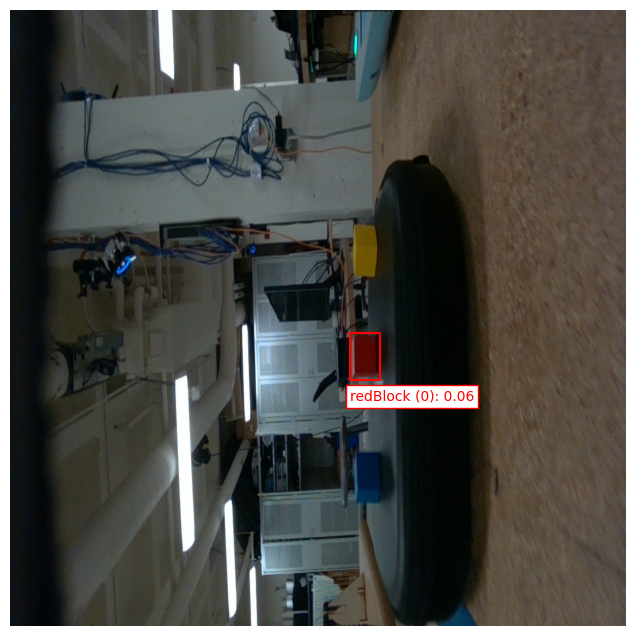

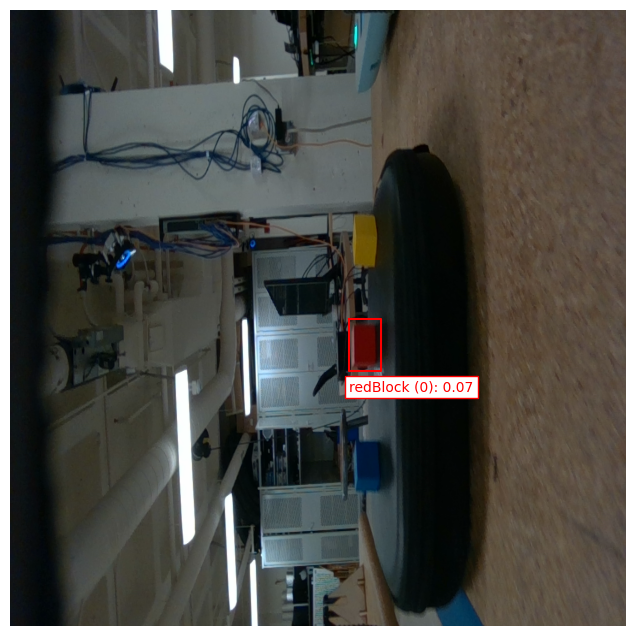

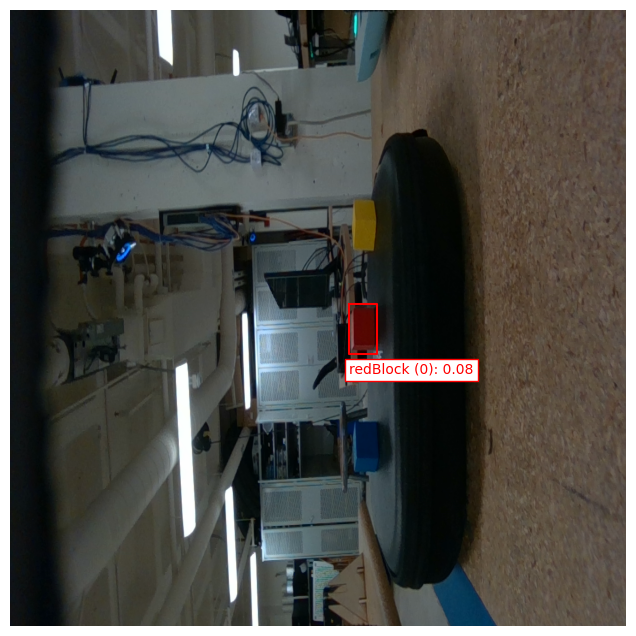

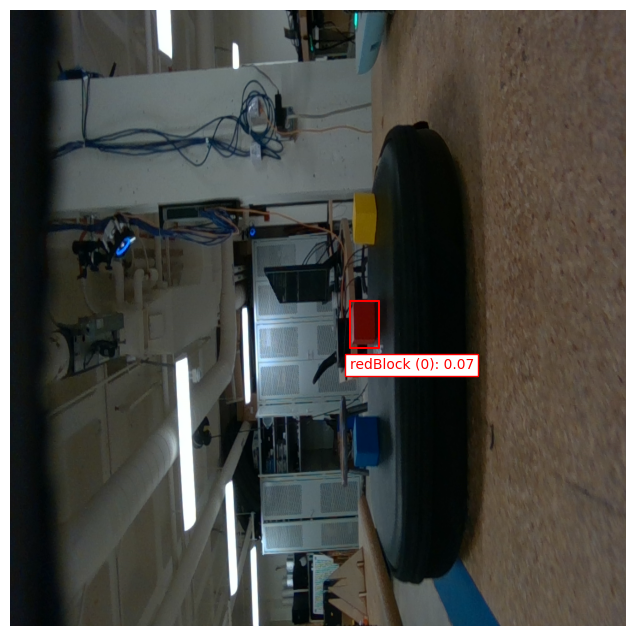

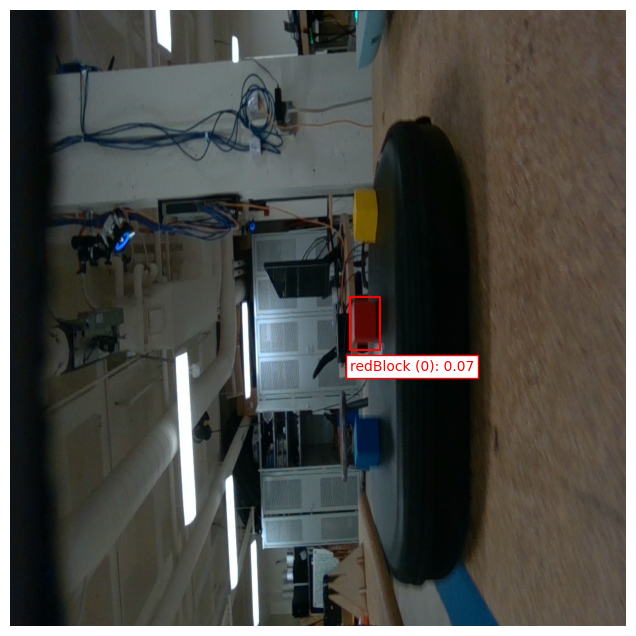

In [7]:
#rotate around object

#jAngle = ur.getJointAngles()
#jAngle[4] += 0.1
#ur.moveJ(jAngle)
import time
incremx = 15/1000 
incremy = 15/1000
angle = 1/100

queries = ["a photo of a red cube"]
abbrevq = ["redBlock"]

label_vit.set_threshold(0.03)

for x in range(0,5):
    time.sleep(1)
    initPose = np.array(ur.getPose())

    dX, dY, dZ = incremx, incremy, 0 # may need to switch increm to dY
    goalPose = initPose
    goalPose[0][3] += dX
    goalPose[1][3] += dY 
    goalPose = sm.SE3(goalPose)

    jAngles = ur.getJointAngles()
    jAngles[4] += angle # scalar is a weight for angle of rotation

    print('Incrementing robot')
    ur.moveL(sm.SE3(goalPose))
    ur.moveJ(jAngles)

    p, rgbd_image = rsc.getPCD()
    image = np.array(rgbd_image.color)
    #bboxes, uboxes, scores = label_vit.label(image, queries, abbrevq, plot=True)
    #print(label_vit.labels)
    #print(scores)

for x in range(0,5): # does the opposite of first loop
    time.sleep(1)
    initPose = np.array(ur.getPose())

    dX, dY, dZ = -incremx, -incremy, 0 # may need to switch increm to dY
    goalPose = initPose
    goalPose[0][3] += dX
    goalPose[1][3] += dY 
    goalPose = sm.SE3(goalPose)

    jAngles = ur.getJointAngles()
    jAngles[4] -= angle # scalar is a weight for angle of rotation

    print('Incrementing robot')
    ur.moveL(sm.SE3(goalPose))
    ur.moveJ(jAngles)

    p, rgbd_image = rsc.getPCD()
    image = np.array(rgbd_image.color)
    if x < 25: label_vit.label(image, queries, abbrevq, plot=True) # conditional to not repeat angles when readjusting
    #print(label_vit.labels)
    #print(scores)

Incrementing robot forward
MoveJ to:
 [[ -69.52112509]
 [ -91.18443608]
 [-132.98475667]
 [-137.28905992]
 [ -74.6412316 ]
 [   0.72696451]]
Incrementing robot forward
MoveJ to:
 [[ -69.52180811]
 [ -91.18580212]
 [-132.98201093]
 [-137.28769388]
 [ -73.21079874]
 [   0.72353128]]
Incrementing robot forward
MoveJ to:
 [[ -69.52593354]
 [ -91.1851191 ]
 [-132.97994822]
 [-137.2883769 ]
 [ -71.77968287]
 [   0.72147133]]


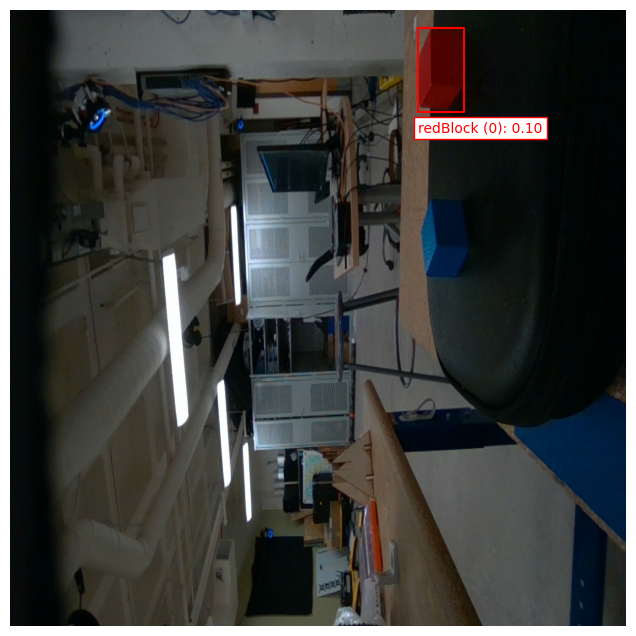

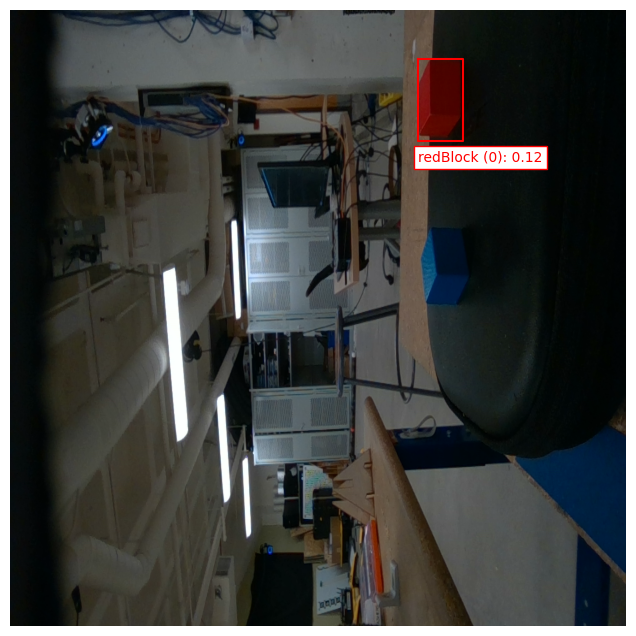

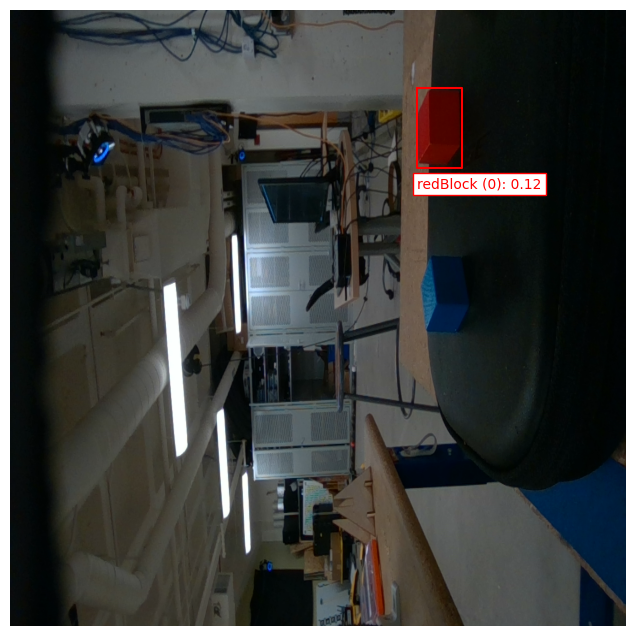

In [22]:
for x in range(0,3): # does the opposite of first loop
    time.sleep(1)
    initPose = np.array(ur.getPose())

    dX, dY, dZ = increm, increm, 0 # may need to switch increm to dY
    goalPose = initPose
    goalPose[0][3] += dX
    goalPose[1][3] += dY 
    goalPose = sm.SE3(goalPose)

    jAngles = ur.getJointAngles()
    jAngles[4] += increm*25 # scalar is a weight for angle of rotation

    print('Incrementing robot forward')
    ur.moveL(sm.SE3(goalPose))
    ur.moveJ(jAngles)

    p, rgbd_image = rsc.getPCD()
    image = np.array(rgbd_image.color)
    if x < 25: label_vit.label(image, queries, abbrevq, plot=True) # conditional to not repeat angles when readjusting
    #print(label_vit.labels)
    #print(scores)

In [ ]:
ur.moveL(sm.SE3(initPose))

In [ ]:
#p, rgbd_image = rsc.getPCD()

#queries = ["a photo of a red cube"]

#abbrevq = ["redBlock"]
#label_vit.set_threshold(0.03)
#bboxes, uboxes = label_vit.label(image2, queries, abbrevq, plot=True)

In [10]:
gripperController.openGripper()
gripperController.disconnect()
ur.c.disconnect()
ur.r.disconnect()
real.disconnect()

Position of dxl ID: 1 set to 303 
Position of dxl ID: 2 set to 729 
Successfully closed port


AttributeError: module 'magpie.realsense_wrapper' has no attribute 'disconnect'